In [6]:
from tkinter import *
from tkcalendar import DateEntry
import datetime as dt

import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [7]:
def visualize():

    # Get Dates From DateEntry and Convert It To Datetime
    from_date = cal_from.get_date()
    to_date = cal_to.get_date()

    start = dt.datetime(from_date.year, from_date.month, from_date.day)
    end = dt.datetime(to_date.year, to_date.month, to_date.day)

    # Load Ticker From Entry And Download Data
    ticker = text_ticker.get()
    data = web.DataReader(ticker, 'yahoo', start, end)

    # Restructure Data Into OHLC Format
    data = data[['Open', 'High', 'Low', 'Close']]

    # Reset Index And Convert Dates Into Numerical Format
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)

    # Adjust Style Of The Plot
    ax = plt.subplot()
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title('{} Share Price'.format(ticker), color='white')
    ax.figure.canvas.set_window_title('NeuralNine Stock Visualizer v0.1 Alpha')
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis_date()

    # Plot The Candlestick Chart
    candlestick_ohlc(ax, data.values, width=0.5, colorup='#00ff00')
    plt.show()

# Define Main Window
root = Tk()
root.title("NeuralNine Stock Visualizer v0.1 Alpha")

# Add Components And Link Function
label_from = Label(root, text="From:")
label_from.pack()
cal_from = DateEntry(root, width=50, year=2010, month=1, day=1)
cal_from.pack(padx=10, pady=10)

label_to = Label(root, text="To:")
label_to.pack()
cal_to = DateEntry(root, width=50)
cal_to.pack(padx=10, pady=10)

label_ticker = Label(root, text="Ticker Symbol:")
label_ticker.pack()
text_ticker = Entry(root)
text_ticker.pack()

btn_visualize = Button(root, text="Visualize", command=visualize)
btn_visualize.pack()

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Vatsa\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Vatsa\AppData\Local\Temp\ipykernel_25840\4128000874.py", line 12, in visualize
    data = web.DataReader(ticker, 'yahoo', start, end)
  File "C:\Users\Vatsa\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 213, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\Vatsa\anaconda3\lib\site-packages\pandas_datareader\data.py", line 370, in DataReader
    return YahooDailyReader(
  File "C:\Users\Vatsa\anaconda3\lib\site-packages\pandas_datareader\base.py", line 253, in read
    df = self._read_one_data(self.url, params=self._get_params(self.symbols))
  File "C:\Users\Vatsa\anaconda3\lib\site-packages\pandas_datareader\yahoo\daily.py", line 152, in _read_one_data
    j = json.loads(re.search(ptrn, resp.text, re.DOTALL).group(1))
AttributeError: 'NoneType' object has no attribute '

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


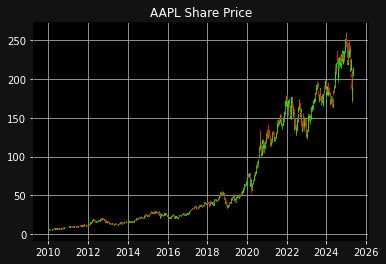

In [ ]:

def visualize():
    # Get Dates from DateEntry
    from_date = cal_from.get_date()
    to_date = cal_to.get_date()

    start = dt.datetime(from_date.year, from_date.month, from_date.day)
    end = dt.datetime(to_date.year, to_date.month, to_date.day)

    # Get Ticker Symbol
    ticker = text_ticker.get().strip().upper()
    if not ticker:
        print("Ticker symbol is empty.")
        return

    # Download Stock Data using yfinance
    try:
        data = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print("Error downloading data:", e)
        return

    if data.empty:
        print("No data found for ticker:", ticker)
        return

    # Prepare data for candlestick
    data = data[['Open', 'High', 'Low', 'Close']]
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)

    ohlc = data[['Date', 'Open', 'High', 'Low', 'Close']]

    # Plot
    fig, ax = plt.subplots()
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.set_title(f'{ticker} Share Price', color='white')
    fig.canvas.manager.set_window_title('Stock Visualizer')
    ax.set_facecolor('black')
    fig.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.xaxis_date()

    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='#00ff00', colordown='#ff0000')

    plt.show()

# GUI setup
root = Tk()
root.title("Lets Visualise Your Stock")

label_from = Label(root, text="From:")
label_from.pack()
cal_from = DateEntry(root, width=50, year=2010, month=1, day=1)
cal_from.pack(padx=10, pady=10)

label_to = Label(root, text="To:")
label_to.pack()
cal_to = DateEntry(root, width=50)
cal_to.pack(padx=10, pady=10)

label_ticker = Label(root, text="Ticker Symbol:")
label_ticker.pack()
text_ticker = Entry(root)
text_ticker.pack()

btn_visualize = Button(root, text="Visualize", command=visualize)
btn_visualize.pack()

root.mainloop()